In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

GESTURES = [
    "punch",
    "flex",
    "wave"
]

SAMPLES_PER_GESTURE = 140

NUM_GESTURES = len(GESTURES)

In [3]:
ONE_HOT_ENCODED_GESTURES = np.eye(NUM_GESTURES)

inputs = []
outputs = []



In [4]:
for gesture_index in range(NUM_GESTURES):
    gesture = GESTURES[gesture_index]
    print(f"Processing index {gesture_index} for gesture '{gesture}'.")

    output = ONE_HOT_ENCODED_GESTURES[gesture_index]

    df = pd.read_csv("D:/VIT SEM-4/ArdProject/" + gesture +".csv")
    num_recordings = int(df.shape[0]/SAMPLES_PER_GESTURE)

    print(f"\tThere are {num_recordings} recordings of the {gesture} gesture.")

    for i in range(num_recordings):
        tensor = []
        for j in range(SAMPLES_PER_GESTURE):
            index = i*SAMPLES_PER_GESTURE + j
            tensor += [
                (df['aX'][index] + 4)/8,
                (df['aY'][index] + 4)/8,
                (df['aZ'][index] + 4)/8,
                (df['gX'][index] + 2000)/4000,
                (df['gY'][index] + 2000)/4000,
                (df['gZ'][index] + 2000)/4000
            ]
        inputs.append(tensor)
        outputs.append(output)
df.info()

Processing index 0 for gesture 'punch'.
	There are 100 recordings of the punch gesture.
Processing index 1 for gesture 'flex'.
	There are 100 recordings of the flex gesture.
Processing index 2 for gesture 'wave'.
	There are 100 recordings of the wave gesture.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   aX      14000 non-null  float64
 1   aY      14000 non-null  float64
 2   aZ      14000 non-null  float64
 3   gX      14000 non-null  float64
 4   gY      14000 non-null  float64
 5   gZ      14000 non-null  float64
dtypes: float64(6)
memory usage: 656.4 KB


In [5]:
inputs = np.array(inputs)
outputs = np.array(outputs)

print("Data set parsing and preparation complete.")

Data set parsing and preparation complete.


In [6]:
num_inputs = len(inputs)
randomize = np.arange(num_inputs)
np.random.shuffle(randomize)

inputs = inputs[randomize]
outputs = outputs[randomize]

TRAIN_SPLIT = int(0.6 * num_inputs)
TEST_SPLIT = int(0.2 * num_inputs + TRAIN_SPLIT)

inputs_train, inputs_test, inputs_validate = np.split(inputs, 
                                                      [TRAIN_SPLIT, TEST_SPLIT])
outputs_train, outputs_test, outputs_validate = np.split(outputs, 
                                                         [TRAIN_SPLIT, TEST_SPLIT])

print("Data set randomization and splitting complete.")
inputs_train.shape, inputs_test.shape, inputs_validate.shape

Data set randomization and splitting complete.


((180, 840), (60, 840), (60, 840))

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = 'relu'),
    tf.keras.layers.Dense(15, activation = 'relu'),
    tf.keras.layers.Dense(NUM_GESTURES, activation = 'softmax')
])

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])

history = model.fit(inputs_train, outputs_train, epochs = 600, batch_size = 1,
                    validation_data = (inputs_validate, outputs_validate))

ERROR! Session/line number was not unique in database. History logging moved to new session 322
Train on 180 samples, validate on 60 samples
Epoch 1/600
180/180 [==============================] - 1s 8ms/sample - loss: 0.0380 - mae: 0.1088 - val_loss: 6.0266e-04 - val_mae: 0.0098
Epoch 2/600
180/180 [==============================] - 1s 4ms/sample - loss: 0.0045 - mae: 0.0103 - val_loss: 3.8696e-04 - val_mae: 0.0044
Epoch 3/600
180/180 [==============================] - 1s 4ms/sample - loss: 0.0047 - mae: 0.0085 - val_loss: 2.6559e-06 - val_mae: 7.4939e-04
Epoch 4/600
180/180 [==============================] - 1s 4ms/sample - loss: 0.0011 - mae: 0.0047 - val_loss: 9.7879e-05 - val_mae: 0.0015
Epoch 5/600
180/180 [==============================] - 1s 4ms/sample - loss: 1.6865e-05 - mae: 7.3965e-04 - val_loss: 0.0192 - val_mae: 0.0357
Epoch 6/600
180/180 [==============================] - 1s 4ms/sample - loss: 6.6709e-06 - mae: 4.3446e-04 - val_loss: 3.2054e-07 - val_mae: 1.0916e-04
Epoch

Epoch 108/600
180/180 [==============================] - 1s 4ms/sample - loss: 9.7742e-12 - mae: 1.1316e-06 - val_loss: 7.0759e-09 - val_mae: 1.0908e-05
Epoch 109/600
180/180 [==============================] - 1s 4ms/sample - loss: 9.6534e-12 - mae: 1.1266e-06 - val_loss: 7.0078e-09 - val_mae: 1.0852e-05
Epoch 110/600
180/180 [==============================] - 1s 5ms/sample - loss: 9.5624e-12 - mae: 1.1188e-06 - val_loss: 7.0327e-09 - val_mae: 1.0863e-05
Epoch 111/600
180/180 [==============================] - 1s 4ms/sample - loss: 9.4763e-12 - mae: 1.1166e-06 - val_loss: 6.8807e-09 - val_mae: 1.0752e-05
Epoch 112/600
180/180 [==============================] - 1s 4ms/sample - loss: 9.3759e-12 - mae: 1.1097e-06 - val_loss: 6.8154e-09 - val_mae: 1.0702e-05
Epoch 113/600
180/180 [==============================] - 1s 4ms/sample - loss: 9.3075e-12 - mae: 1.1053e-06 - val_loss: 6.7581e-09 - val_mae: 1.0656e-05
Epoch 114/600
180/180 [==============================] - 1s 4ms/sample - loss: 9.2

180/180 [==============================] - 1s 4ms/sample - loss: 4.7049e-12 - mae: 7.7101e-07 - val_loss: 4.3639e-09 - val_mae: 8.4008e-06
Epoch 215/600
180/180 [==============================] - 1s 5ms/sample - loss: 4.6904e-12 - mae: 7.7027e-07 - val_loss: 4.3631e-09 - val_mae: 8.3969e-06
Epoch 216/600
180/180 [==============================] - 1s 4ms/sample - loss: 4.6748e-12 - mae: 7.6904e-07 - val_loss: 4.3501e-09 - val_mae: 8.3828e-06
Epoch 217/600
180/180 [==============================] - 1s 4ms/sample - loss: 4.6404e-12 - mae: 7.6678e-07 - val_loss: 4.3090e-09 - val_mae: 8.3465e-06
Epoch 218/600
180/180 [==============================] - 1s 5ms/sample - loss: 4.6273e-12 - mae: 7.6531e-07 - val_loss: 4.3060e-09 - val_mae: 8.3408e-06
Epoch 219/600
180/180 [==============================] - 1s 5ms/sample - loss: 4.5892e-12 - mae: 7.6067e-07 - val_loss: 4.2923e-09 - val_mae: 8.3263e-06
Epoch 220/600
180/180 [==============================] - 1s 4ms/sample - loss: 4.5734e-12 - mae:

180/180 [==============================] - 1s 4ms/sample - loss: 3.0984e-12 - mae: 6.1906e-07 - val_loss: 3.3136e-09 - val_mae: 7.2439e-06
Epoch 321/600
180/180 [==============================] - 1s 4ms/sample - loss: 3.0838e-12 - mae: 6.1755e-07 - val_loss: 3.3210e-09 - val_mae: 7.2492e-06
Epoch 322/600
180/180 [==============================] - 1s 4ms/sample - loss: 3.0790e-12 - mae: 6.1698e-07 - val_loss: 3.3213e-09 - val_mae: 7.2474e-06
Epoch 323/600
180/180 [==============================] - 1s 4ms/sample - loss: 3.0649e-12 - mae: 6.1584e-07 - val_loss: 3.3241e-09 - val_mae: 7.2492e-06
Epoch 324/600
180/180 [==============================] - 1s 4ms/sample - loss: 3.0561e-12 - mae: 6.1547e-07 - val_loss: 3.2996e-09 - val_mae: 7.2241e-06
Epoch 325/600
180/180 [==============================] - 1s 4ms/sample - loss: 3.0488e-12 - mae: 6.1360e-07 - val_loss: 3.3006e-09 - val_mae: 7.2236e-06
Epoch 326/600
180/180 [==============================] - 1s 4ms/sample - loss: 3.0336e-12 - mae:

180/180 [==============================] - 1s 4ms/sample - loss: 2.2920e-12 - mae: 5.2906e-07 - val_loss: 2.7428e-09 - val_mae: 6.5410e-06
Epoch 427/600
180/180 [==============================] - 1s 4ms/sample - loss: 2.2904e-12 - mae: 5.2926e-07 - val_loss: 2.7362e-09 - val_mae: 6.5337e-06
Epoch 428/600
180/180 [==============================] - 1s 4ms/sample - loss: 2.2872e-12 - mae: 5.2828e-07 - val_loss: 2.7357e-09 - val_mae: 6.5319e-06
Epoch 429/600
180/180 [==============================] - 1s 5ms/sample - loss: 2.2811e-12 - mae: 5.2833e-07 - val_loss: 2.7279e-09 - val_mae: 6.5232e-06
Epoch 430/600
180/180 [==============================] - 1s 4ms/sample - loss: 2.2735e-12 - mae: 5.2724e-07 - val_loss: 2.7147e-09 - val_mae: 6.5077e-06
Epoch 431/600
180/180 [==============================] - 1s 4ms/sample - loss: 2.2752e-12 - mae: 5.2687e-07 - val_loss: 2.7139e-09 - val_mae: 6.5056e-06
Epoch 432/600
180/180 [==============================] - 1s 5ms/sample - loss: 2.2621e-12 - mae:

180/180 [==============================] - 1s 4ms/sample - loss: 1.8292e-12 - mae: 4.7063e-07 - val_loss: 2.3444e-09 - val_mae: 6.0172e-06
Epoch 533/600
180/180 [==============================] - 1s 4ms/sample - loss: 1.8324e-12 - mae: 4.7053e-07 - val_loss: 2.3452e-09 - val_mae: 6.0162e-06
Epoch 534/600
180/180 [==============================] - 1s 4ms/sample - loss: 1.8226e-12 - mae: 4.6951e-07 - val_loss: 2.3441e-09 - val_mae: 6.0146e-06
Epoch 535/600
180/180 [==============================] - 1s 4ms/sample - loss: 1.8131e-12 - mae: 4.6884e-07 - val_loss: 2.3389e-09 - val_mae: 6.0084e-06
Epoch 536/600
180/180 [==============================] - 1s 5ms/sample - loss: 1.8118e-12 - mae: 4.6861e-07 - val_loss: 2.3396e-09 - val_mae: 6.0088e-06
Epoch 537/600
180/180 [==============================] - 1s 4ms/sample - loss: 1.8153e-12 - mae: 4.6846e-07 - val_loss: 2.3360e-09 - val_mae: 6.0044e-06
Epoch 538/600
180/180 [==============================] - 1s 4ms/sample - loss: 1.8089e-12 - mae:

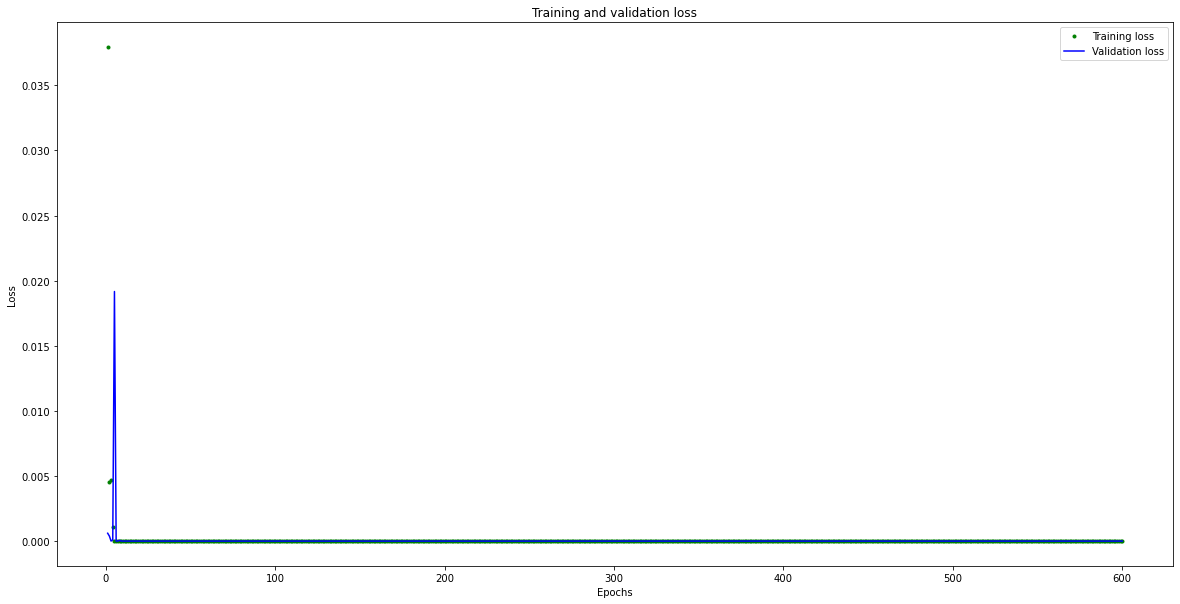

[20.0, 10.0]


In [11]:
plt.rcParams["figure.figsize"] = (20,10)

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print(plt.rcParams["figure.figsize"])

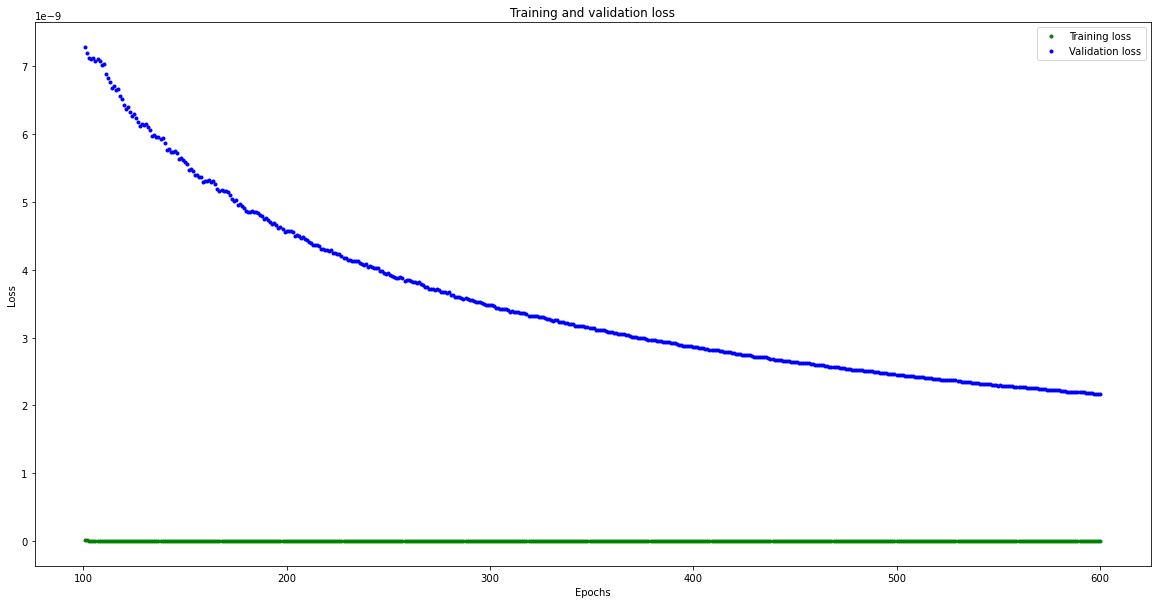

In [12]:
SKIP = 100
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label = 'Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

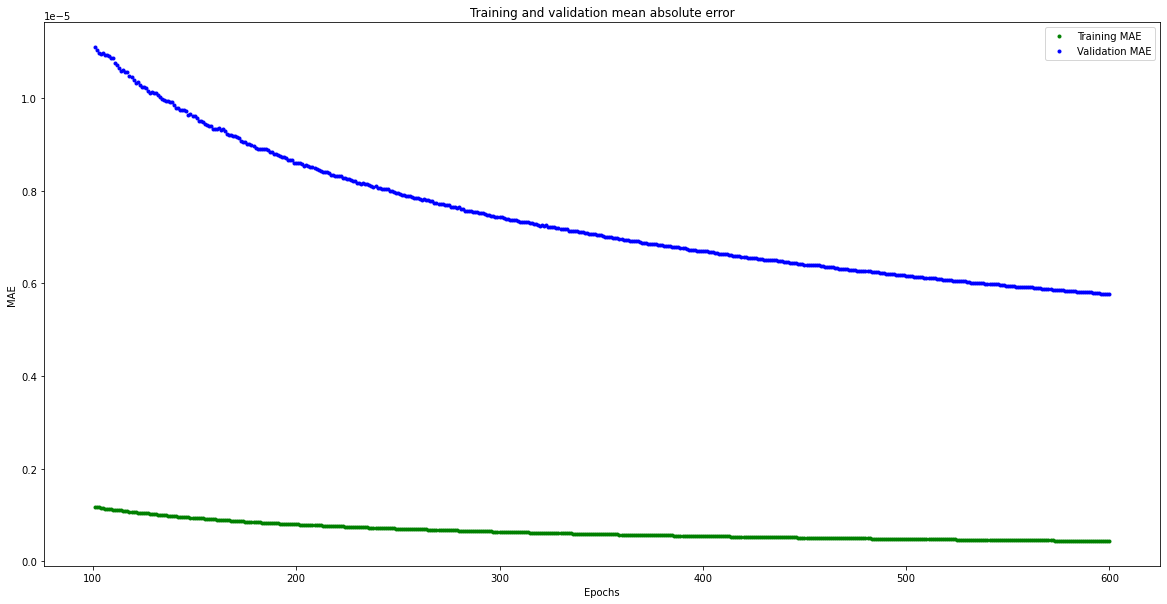

In [13]:
mae = history.history['mae']
val_mae = history.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label = 'Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label = 'Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

predictions = 
 [[1.    0.    0.   ]
 [0.    0.    1.   ]
 [0.    1.    0.   ]
 [0.    1.    0.   ]
 [1.    0.    0.   ]
 [1.    0.    0.   ]
 [0.    1.    0.   ]
 [1.    0.    0.   ]
 [0.    0.    1.   ]
 [0.    0.    1.   ]
 [0.    0.    1.   ]
 [1.    0.    0.   ]
 [0.    0.    1.   ]
 [0.    0.    1.   ]
 [1.    0.    0.   ]
 [0.    0.    1.   ]
 [1.    0.    0.   ]
 [0.    0.    1.   ]
 [0.    1.    0.   ]
 [0.967 0.033 0.   ]
 [0.    0.    1.   ]
 [1.    0.    0.   ]
 [0.    0.    1.   ]
 [0.    0.    1.   ]
 [0.    1.    0.   ]
 [0.    0.    1.   ]
 [0.    1.    0.   ]
 [0.    0.    1.   ]
 [0.    0.    1.   ]
 [0.    0.    1.   ]
 [0.    1.    0.   ]
 [0.    1.    0.   ]
 [1.    0.    0.   ]
 [0.    0.    1.   ]
 [0.    0.    1.   ]
 [0.    1.    0.   ]
 [0.    0.    1.   ]
 [0.    0.    1.   ]
 [0.    1.    0.   ]
 [0.    0.    1.   ]
 [1.    0.    0.   ]
 [1.    0.    0.   ]
 [0.    0.    1.   ]
 [0.    1.    0.   ]
 [1.    0.    0.   ]
 [0.    0.    1.   ]
 [0.    1.    0.  

C:\Users\91956\miniconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: cycling among columns of inputs with non-matching shapes is deprecated.
  
C:\Users\91956\miniconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: cycling among columns of inputs with non-matching shapes is deprecated.
  if __name__ == '__main__':


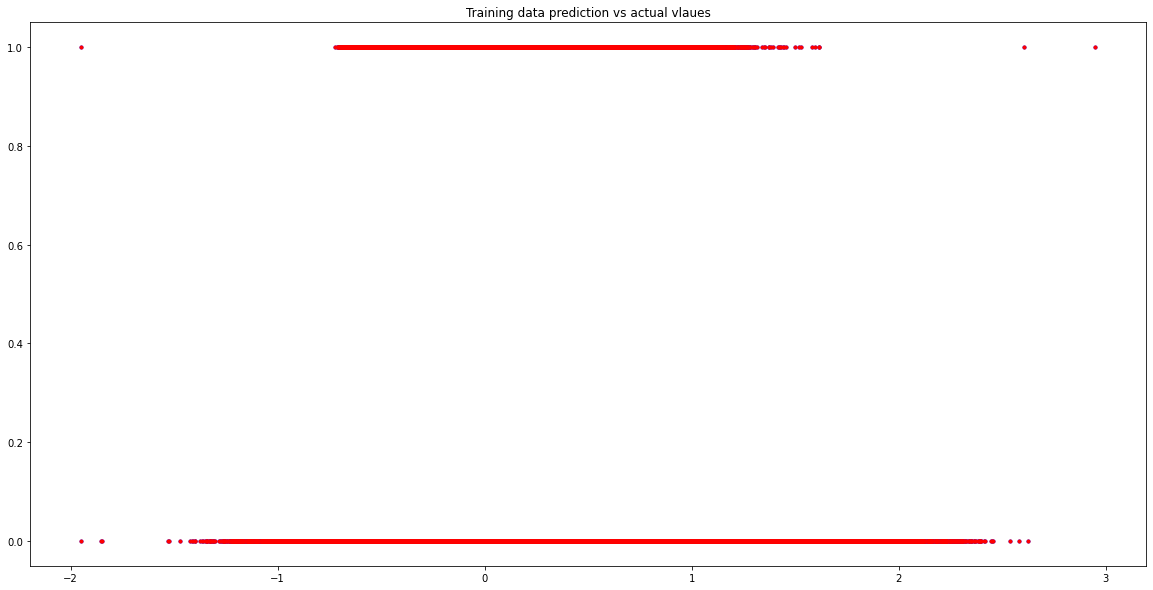

In [14]:
predictions = model.predict(inputs_test)

print("predictions = \n", np.round(predictions, decimals = 3))
print("actual = \n", outputs_test)

plt.clf()
plt.title('Training data prediction vs actual vlaues')
plt.plot(inputs_test, outputs_test, 'b.', label = 'Actual')
plt.plot(inputs_test, outputs_test, 'r.', label = 'Predicted')
plt.show()

In [15]:
from sklearn.metrics import accuracy_score

In [18]:
accuracy_score(outputs_test,np.round(predictions, decimals = 1))

1.0

In [ ]:
model.save("Gesture_recognition.h5")

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\91956\miniconda3\envs\ml\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-7139e12a0414>", line 1, in <module>
    model.save("Gesture_recognition.h5")
NameError: name 'model' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\91956\miniconda3\envs\ml\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\91956\miniconda3\envs\ml\lib\site-packages\IPython\core\ultratb.py", line 1169, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "C:\Users\919

In [7]:
model = tf.keras.models.load_model("Gesture_recognition.h5")

ERROR! Session/line number was not unique in database. History logging moved to new session 321
